In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Table 4.1 Lattice constant
Model	Lattice Constant (Å)

DFT: 3.185

ACE-DFT: 3.190

MACE MP0:	3.188

MACE-MP-FT:	3.190

ACE-MACE-MP-0: 3.191

ACE-MACE-MP-FT:	3.197


# Figure 4.1 Cubic elastic constants

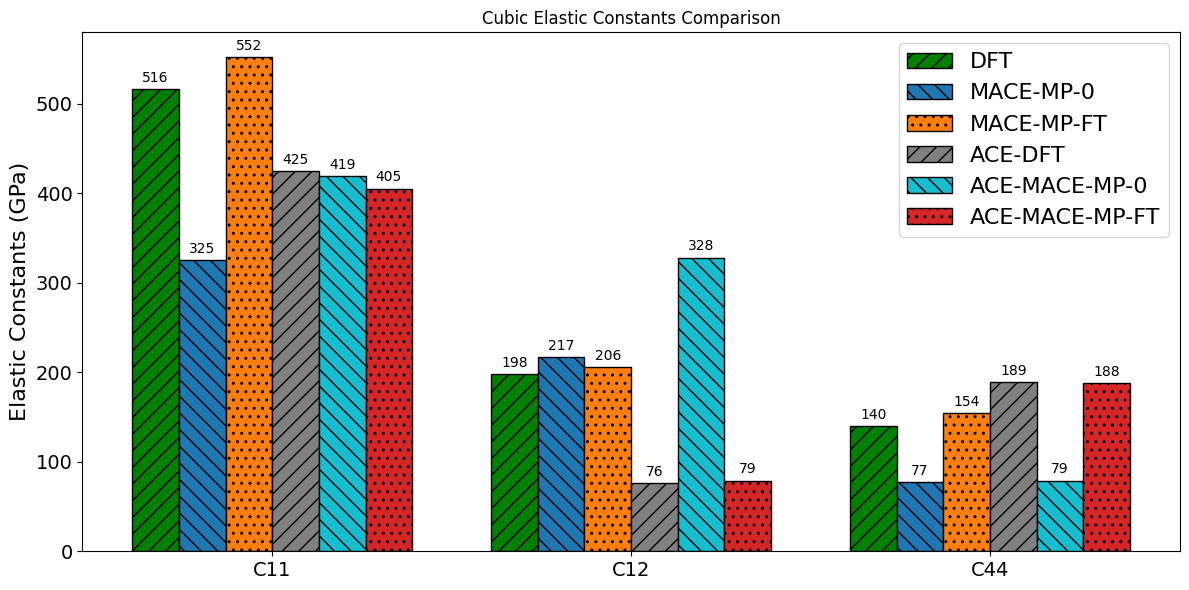

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT", "MACE-MP-0", "MACE-MP-FT",
          "ACE-DFT", "ACE-MACE-MP-0", "ACE-MACE-MP-FT"]

C11 = [516.0, 325.0, 552.0, 425.0, 419, 405.0]
C12 = [198.0, 217.0, 206.0, 76.0, 328, 79.0]
C44 = [140.0, 77.0, 154.0, 189.0, 79, 188.0]

constants = ["C11", "C12", "C44"]
data = np.array([C11, C12, C44])  # shape (3, 6)

# X positions (groups = constants)
x = np.arange(len(constants))
width = 0.13  # narrower bars since many models

# Colors for each model (different!)
colors = ["green", "tab:blue", "tab:orange",
          "gray", "tab:cyan", "tab:red"]

# Hatches shared between teacher–student groups
hatches = {
    "DFT": "//",
    "ACE-DFT": "//",
    "MACE-MP-0": "\\\\",
    "ACE-MACE-MP-0": "\\\\",
    "MACE-MP-FT": "..",
    "ACE-MACE-MP-FT": "..",
}

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 6))

for i, model in enumerate(models):
    ax.bar(x + (i - len(models)/2)*width + width/2,
           data[:, i], width, label=model,
           color=colors[i], hatch=hatches[model], edgecolor="black")

# Labels and ticks
ax.set_ylabel("Elastic Constants (GPa)", fontsize=16)
#ax.set_yticklabels(fontsize=14)
ax.set_title("Cubic Elastic Constants Comparison")
ax.set_xticks(x)
ax.set_xticklabels(constants, fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.legend(fontsize=16)

# Annotate values
def autolabel():
    for i in range(len(models)):
        for j in range(len(constants)):
            val = data[j, i]
            xpos = x[j] + (i - len(models)/2)*width + width/2
            ax.annotate(f'{val:.0f}',
                        xy=(xpos, val),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel()

plt.tight_layout()
plt.savefig("cubic_constants_hatch_groups.png", dpi=300)
plt.show()


# Figure 4.2 ΔE-V

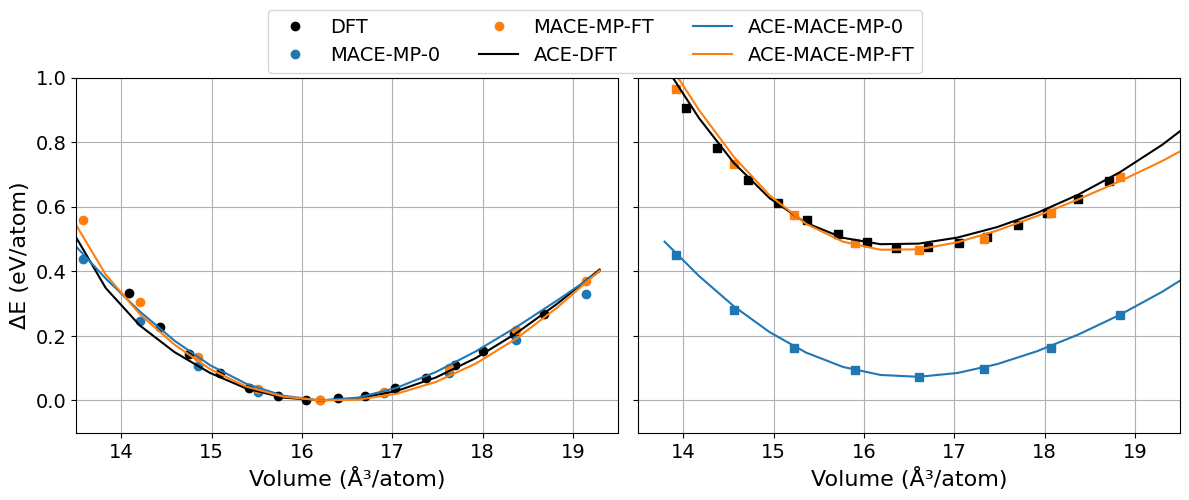

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Settings
# -----------------------------
files = [
    "DeltaE_vs_V_W_DFT.csv",
    "DeltaE_vs_V_W_MACE_MP_0.csv",
    "DeltaE_vs_V_W_MACE-MP_FT.csv",
    "DeltaE_vs_V_W_ACE_DFT.csv",
    "DeltaE_vs_V_W_ACE_MACE_MP_0.csv",
    "DeltaE_vs_V_W_ACE_MACE_MP_FT.csv",
]

models = ["DFT", "MACE-MP-0", "MACE-MP-FT",
          "ACE-DFT", "ACE-MACE-MP-0", "ACE-MACE-MP-FT"]

# Define consistent colors (teachers + students same color)
colors = {
    "DFT": "black",
    "ACE-DFT": "black",
    "MACE-MP-0": "tab:blue",
    "ACE-MACE-MP-0": "tab:blue",
    "MACE-MP-FT": "tab:orange",
    "ACE-MACE-MP-FT": "tab:orange",
}

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ---- BCC ----
for i, (file, model) in enumerate(zip(files, models)):
    df = pd.read_csv(file)
    if i < 3:  # first three models = markers only
        axes[0].plot(df["V_BCC"], df["DeltaE_BCC"],
                     marker='o', linestyle='None', color=colors[model], label=model)
    else:      # last three models = line
        axes[0].plot(df["V_BCC"], df["DeltaE_BCC"],
                     linestyle='-', color=colors[model], label=model)

axes[0].set_xlabel("Volume (Å³/atom)", fontsize=16)
axes[0].set_ylabel("ΔE (eV/atom)", fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_xlim(13.5, 19.5)
axes[0].set_ylim(-0.1, 1)
axes[0].grid(True)

# ---- FCC ----
for i, (file, model) in enumerate(zip(files, models)):
    df = pd.read_csv(file)
    if i < 3:  # first three models = markers only
        axes[1].plot(df["V_FCC"], df["DeltaE_FCC"],
                     marker='s', linestyle='None', color=colors[model], label=model)
    else:      # last three models = line
        axes[1].plot(df["V_FCC"], df["DeltaE_FCC"],
                     linestyle='-', color=colors[model], label=model)

axes[1].set_xlabel("Volume (Å³/atom)", fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)

axes[1].set_xlim(13.5, 19.5)
axes[1].grid(True)

# Shared legend
fig.legend(models, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.01), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig("DeltaE_vs_V_W_Comparison.png", dpi=300)
plt.show()


# Figure 4.3 Vacancy formation energy

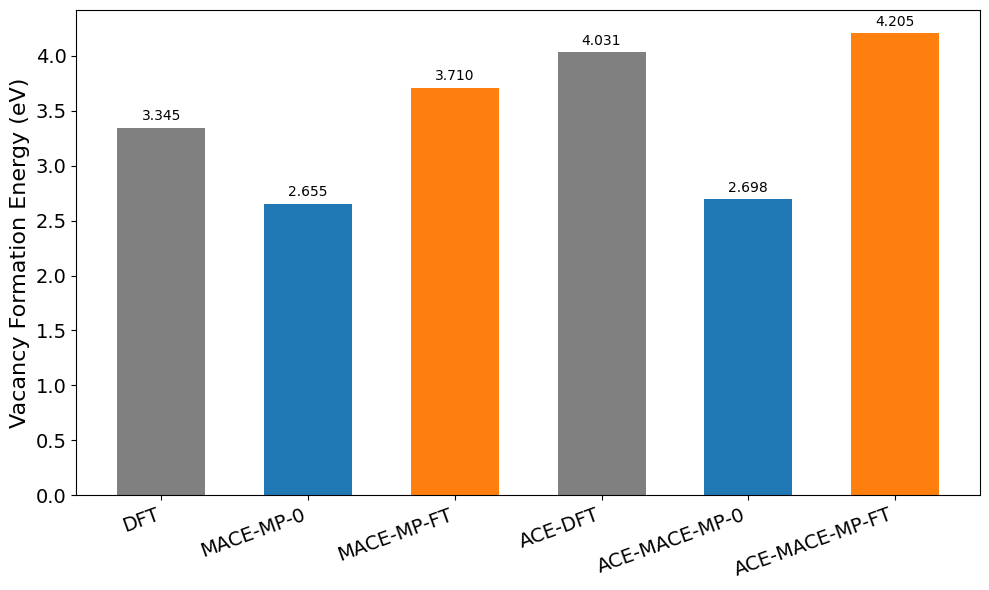

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["DFT", "MACE-MP-0", "MACE-MP-FT",
          "ACE-DFT", "ACE-MACE-MP-0", "ACE-MACE-MP-FT"]

vacancy_energies = [3.345, 2.655, 3.71, 4.031, 2.698, 4.205]  # eV

# Assign colors: teachers and students share colors
colors = {
    "DFT": "gray",
    "ACE-DFT": "gray",
    "MACE-MP-0": "tab:blue",
    "ACE-MACE-MP-0": "tab:blue",
    "MACE-MP-FT": "tab:orange",
    "ACE-MACE-MP-FT": "tab:orange",
}

x = np.arange(len(models))
width = 0.6

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, vacancy_energies, width,
              color=[colors[m] for m in models])

# Labels and ticks
ax.set_ylabel("Vacancy Formation Energy (eV)", fontsize=16)
#ax.set_title("Vacancy Formation Energy Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20, ha="right")
ax.tick_params(axis='both', which='major', labelsize=14)

# Annotate values
for bar, val in zip(bars, vacancy_energies):
    height = bar.get_height()
    ax.annotate(f"{val:.3f}",
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig("vacancy_formation_energy_grouped.png", dpi=300)
plt.show()
